 **Scikit-Learn**


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
diabetes = datasets.load_diabetes()
X_train = diabetes['data']
Y_train = diabetes['target']

In [4]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, Y_train)


LinearRegression()

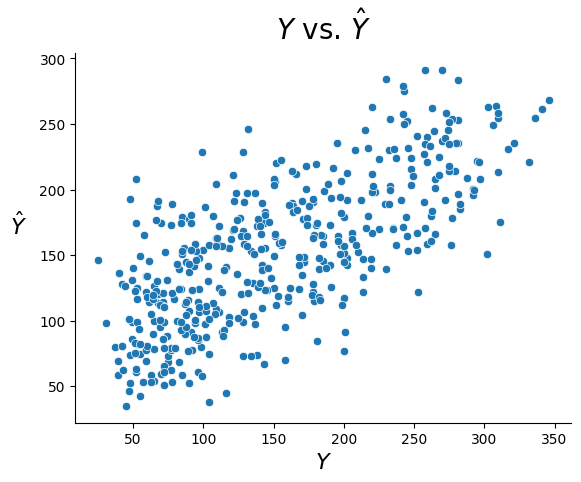

In [8]:
sklearn_predictions = sklearn_model.predict(X_train)
fig, ax = plt.subplots()
sns.scatterplot(x = Y_train,y = sklearn_predictions)
ax.set_xlabel(r'$Y$', size = 16)
ax.set_ylabel(r'$\hat{Y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$Y$ vs. $\hat{Y}$', size = 20, pad = 10)
sns.despine()

In [10]:
#to check the estimated parameters using coef_ attribute

predictors = diabetes.feature_names
theta_hats = sklearn_model.coef_
print('\n'.join([f'{predictors[i]}: {round(theta_hats[i], 3)}' for i in range(3)]))

age: -10.01
sex: -239.816
bmi: 519.846


**Statsmodels**

In [13]:
import statsmodels.api as sm

X_train_with_constant = sm.add_constant(X_train)
sm_model1 = sm.OLS(Y_train, X_train_with_constant)
sm_fit1 = sm_model1.fit()
sm_predictions1 = sm_fit1.predict(X_train_with_constant)

In [14]:
import pandas as pd

df = pd.DataFrame(X_train, columns = diabetes['feature_names'])
df['target'] = Y_train
display(df.head())

formula = 'target ~ ' + ' + '.join(diabetes['feature_names'])
print('formula:', formula)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


formula: target ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6


In [17]:
import statsmodels.formula.api as smf

sm_model2 = smf.ols(formula, data = df)
sm_fit2 = sm_model2.fit()
sm_predictions2 = sm_fit2.predict()